In [2]:
!pip install opencv-python
!pip install opencv-python-headless

You should consider upgrading via the '/usr/bin/python3 -m pip install --upgrade pip' command.
You should consider upgrading via the '/usr/bin/python3 -m pip install --upgrade pip' command.


In [3]:
pip install -U scikit-image

     |████████████████████████████████| 12.4 MB 15.4 MB/s eta 0:00:01
     |████████████████████████████████| 1.6 MB 28.6 MB/s eta 0:00:01
     |███████████████████████████████ | 143 kB 26.8 MB/s eta 0:00:01     |████████████████████████████████| 148 kB 26.8 MB/s 
     |████████████████████████████████| 4.4 MB 40.9 MB/s eta 0:00:01
You should consider upgrading via the '/usr/bin/python3 -m pip install --upgrade pip' command.
Note: you may need to restart the kernel to use updated packages.


In [4]:
import scipy

In [5]:
import tensorflow as tf
from keras.applications.vgg16 import VGG16
from keras.applications.vgg16 import preprocess_input
from keras.preprocessing.image import load_img
from keras.preprocessing.image import img_to_array
from keras.models import Model
from keras import layers, Sequential
from matplotlib import pyplot
from math import floor
import numpy as np
import cv2
from os import listdir
from os.path import isfile, join
from numpy import expand_dims, array, exp, max
import json
import skimage.feature as feature
from skimage.io import imread
from skimage.color import rgb2gray

from skimage.transform import resize

In [6]:
model1 = VGG16()
model2 = Model(inputs=model1.inputs, outputs=model1.layers[1].output)
# model.add(layers.MaxPool2D(pool_size=(2, 2),strides=(1, 1), padding='valid'))
model = Sequential(layers=model2.layers)
model.add(layers.MaxPool2D(pool_size=(3, 3), strides=(3, 3), padding='same'))
# model = Model(inputs=model.inputs, outputs = model.layers[1].output)

model.summary()

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
block1_conv1 (Conv2D)        (None, 224, 224, 64)      1792      
_________________________________________________________________
max_pooling2d (MaxPooling2D) (None, 75, 75, 64)        0         
Total params: 1,792
Trainable params: 1,792
Non-trainable params: 0
_________________________________________________________________


In [7]:
class LocalBinaryPatterns:
  def __init__(self, numPoints, radius):
    self.numPoints = numPoints
    self.radius = radius

  def describe(self, image, eps = 1e-7):
    lbp = feature.local_binary_pattern(image, self.numPoints, self.radius, method="uniform")
    (hist, _) = np.histogram(lbp.ravel(), bins=np.arange(0, self.numPoints+3), range=(0, self.numPoints + 2))

    # Normalize the histogram
    hist = hist.astype('float')
    hist /= (hist.sum() + eps)

    return hist, lbp

In [33]:
###########################THIS CODE CHECKS IMAGES FROM A FOLDER#################################

def sortTrainImages():
    # get the class labels from training datasets
    p = {}
    data_path = '../StanfordDogs/Stanford_Dogs'
    img_gen = tf.keras.preprocessing.image.ImageDataGenerator(rescale=1. / 255, rotation_range=20)
    #labels = img_gen.flow_from_directory(data_path + '/Images')
    #train_labels = labels.class_indices.keys()

    #for lbl in train_labels:
    resnet_path = data_path +'/Images/' + 'n02087046-toy_terrier'
    p_files = [f for f in listdir(resnet_path) if isfile(join(resnet_path, f))]
    pests_images = np.empty(len(p_files), dtype=object)
    print(p_files)
    for m in range(0, len(p_files)):
        
            #print(join(resnet_path, p_files[m]))
        imageName_x = p_files[m]
        p.update({'n02087046-toy_terrier' + "_" + str(m): imageName_x})
            ######if m < 25:
                #pests_images[m] = cv2.imread(join(resnet_path, p_files[m]))
                # get the name of the image
                ######imageName_x = p_files[m]
                #####p.update({lbl + "_" + str(m): imageName_x})

    return p


images_collection = sortTrainImages()

['n02087046_4809.jpg', 'n02087046_3953.jpg', 'n02087046_5860.jpg', 'n02087046_2485.jpg', 'n02087046_5224.jpg', 'n02087046_5626.jpg', 'n02087046_8471.jpg', 'n02087046_4455.jpg', 'n02087046_4506.jpg', 'n02087046_2957.jpg', 'n02087046_406.jpg', 'n02087046_133.jpg', 'n02087046_6857.jpg', 'n02087046_336.jpg', 'n02087046_2276.jpg', 'n02087046_4751.jpg', 'n02087046_5499.jpg', 'n02087046_2752.jpg', 'n02087046_309.jpg', 'n02087046_1520.jpg', 'n02087046_3944.jpg', 'n02087046_4066.jpg', 'n02087046_4235.jpg', 'n02087046_224.jpg', 'n02087046_7166.jpg', 'n02087046_5701.jpg', 'n02087046_1468.jpg', 'n02087046_1724.jpg', 'n02087046_5541.jpg', 'n02087046_4370.jpg', 'n02087046_4127.jpg', 'n02087046_1703.jpg', 'n02087046_2419.jpg', 'n02087046_3543.jpg', 'n02087046_6166.jpg', 'n02087046_5890.jpg', 'n02087046_1577.jpg', 'n02087046_2819.jpg', 'n02087046_2168.jpg', 'n02087046_178.jpg', 'n02087046_568.jpg', 'n02087046_5383.jpg', 'n02087046_4102.jpg', 'n02087046_4039.jpg', 'n02087046_2141.jpg', 'n02087046_1004.

In [34]:
def softMax(temperature, features_list):
    feat_list = [x / temperature for x in features_list]
    feature_list = exp(feat_list - max(feat_list))
    return feature_list / feature_list.sum(axis=0)

n02087046-toy_terrier_0
n02087046-toy_terrier_1


/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:36: MatplotlibDeprecationWarning: Adding an axes using the same arguments as a previous axes currently reuses the earlier instance.  In a future version, a new instance will always be created and returned.  Meanwhile, this warning can be suppressed, and the future behavior ensured, by passing a unique label to each axes instance.


n02087046-toy_terrier_2
n02087046-toy_terrier_3
n02087046-toy_terrier_4
n02087046-toy_terrier_5
n02087046-toy_terrier_6
n02087046-toy_terrier_7
n02087046-toy_terrier_8
n02087046-toy_terrier_9
n02087046-toy_terrier_10
n02087046-toy_terrier_11
n02087046-toy_terrier_12
n02087046-toy_terrier_13
n02087046-toy_terrier_14
n02087046-toy_terrier_15
n02087046-toy_terrier_16
n02087046-toy_terrier_17
n02087046-toy_terrier_18
n02087046-toy_terrier_19
n02087046-toy_terrier_20
n02087046-toy_terrier_21
n02087046-toy_terrier_22
n02087046-toy_terrier_23
n02087046-toy_terrier_24
n02087046-toy_terrier_25
n02087046-toy_terrier_26
n02087046-toy_terrier_27
n02087046-toy_terrier_28
n02087046-toy_terrier_29
n02087046-toy_terrier_30
n02087046-toy_terrier_31
n02087046-toy_terrier_32
n02087046-toy_terrier_33
n02087046-toy_terrier_34
n02087046-toy_terrier_35
n02087046-toy_terrier_36
n02087046-toy_terrier_37
n02087046-toy_terrier_38
n02087046-toy_terrier_39
n02087046-toy_terrier_40
n02087046-toy_terrier_41
n0208704

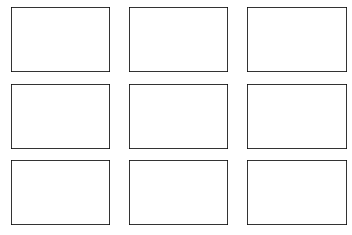

In [35]:
features_prob_dist_array = []

for o, j in images_collection.items():
    print(o)
    contrast_features_array = []
    homogeneity_features_array = []
    dissimilarity_features_array = []
    energy_features_array = []
    correlation_features_array = []
    
    image_string = '../StanfordDogs/Stanford_Dogs/Images/n02087046-toy_terrier/' + j
  
    img = imread(image_string)
    img = resize(img,(224,224,3))
        # get the path of image to extract the class
    img_class =j[0]
    img = img_to_array(img)    
    # expand the image dimensions
    img = expand_dims(img, axis=0)
        # scale the pixels
    img = preprocess_input(img)
        # get the features of the first layer
    feature_maps = model.predict(img)
    
    correlation_numerator = []
    energy_numerator = []
    homogeneity_numerator = []
    dissimilarity_numerator = []
    contrast_numerator = []
    
    ix = 1
    square = 3

    for _ in range(square):
        for _ in range(square):
            ax = pyplot.subplot(square, square, ix)
            ax.set_xticks([])
            ax.set_yticks([])
            ##################FLATTEN THE FEATURE for dimensionality reduction##################################
            feature_items = array(feature_maps[0, :, :, ix - 1])
            #get the unsigned values of the feature
            features_x = feature_items.astype(np.uint8)        
            #get the grey-level cooccurrence matrix
            graycom = feature.greycomatrix(features_x, [1], [0, np.pi/4, np.pi/2, 3*np.pi/4], levels=256)            
            # Find the GLCM properties
            correlation = feature.greycoprops(graycom, 'correlation') 
            contrast = feature.greycoprops(graycom, 'contrast')
            dissimilarity = feature.greycoprops(graycom, 'dissimilarity')
            homogeneity = feature.greycoprops(graycom, 'homogeneity')
            energy = feature.greycoprops(graycom, 'energy')
            correlation = feature.greycoprops(graycom, 'correlation') 
            
            #get the probability distribution using correlation harrick features except correlation
            contrast_prob = softMax(0.5,contrast[0])
            dissimilarity_prob = softMax(0.5,dissimilarity[0])
            homogeneity_prob = softMax(0.5,homogeneity[0])
            energy_prob = softMax(0.5,energy[0])
            correlation_prob = softMax(0.5,correlation[0])
            
            #get the conflated distribution for this feature
            conf_numerator_contrast = np.prod(contrast_prob)
            conf_numerator_dissimilarity = np.prod(correlation_prob)
            conf_numerator_homogeneity = np.prod(homogeneity_prob)
            conf_numerator_energy = np.prod(energy_prob)
            conf_numerator_correlation = np.prod(correlation_prob)
            
            contrast_numerator.append(conf_numerator_contrast)
            energy_numerator.append(conf_numerator_energy)
            dissimilarity_numerator.append(conf_numerator_dissimilarity)
            homogeneity_numerator.append(conf_numerator_homogeneity)
            correlation_numerator.append(conf_numerator_correlation)
            
            #image_features_array.append(correlation_prob)
            contrast_features_array.append(contrast_numerator)
            homogeneity_features_array.append(homogeneity_numerator)
            dissimilarity_features_array.append(dissimilarity_numerator)
            energy_features_array.append(energy_numerator)
            correlation_features_array.append(correlation_numerator)
            #pyplot.imshow(feature_maps[0, :, :, ix - 1], cmap='gray')
            
            ix += 1
    correlation_denominator = np.trapz(correlation_numerator,axis=0)
    contrast_denominator = np.trapz(contrast_numerator,axis=0)
    homogeneity_denominator = np.trapz(homogeneity_numerator,axis=0)
    dissimilarity_denominator = np.trapz(dissimilarity_numerator,axis=0)
    energy_denominator = np.trapz(energy_numerator,axis=0)
    
    #conflated distribution for the image becomes
    conflated_dist_correlation = correlation_numerator/correlation_denominator
    conflated_dist_contrast = contrast_numerator/contrast_denominator
    conflated_dist_homogeneity = homogeneity_numerator/homogeneity_denominator
    conflated_dist_dissimilarity = dissimilarity_numerator/dissimilarity_denominator
    conflated_dist_energy = energy_numerator/energy_denominator
    
    new_rec_corr = {j + "_/" +'n02087046-toy_terrier': conflated_dist_correlation.tolist()}
    new_rec_cont = {j + "_/" +'n02087046-toy_terrier': conflated_dist_contrast.tolist()}
    new_rec_homo = {j + "_/" +'n02087046-toy_terrier': conflated_dist_homogeneity.tolist()}
    new_rec_diss = {j + "_/" +'n02087046-toy_terrier': conflated_dist_dissimilarity.tolist()}
    new_rec_ener = {j + "_/" +'n02087046-toy_terrier': conflated_dist_energy.tolist()}
        
    with open("../files/stanford/glcm/stanford_domain_data_new_correlation_glcm.json", 'r+') as file:
        # First we load existing data into a dict.
        file_data = json.load(file)
        # Join new_data with file_data inside emp_details
        file_data["target_images"].append(new_rec_corr)
        # Sets file's current position at offset.
        file.seek(0)
        # convert back to json.
        json.dump(file_data, file, indent=4)
    
    with open("../files/stanford/glcm/stanford_domain_data_new_contrast_glcm.json", 'r+') as file:
        # First we load existing data into a dict.
        file_data = json.load(file)
        # Join new_data with file_data inside emp_details
        file_data["target_images"].append(new_rec_cont)
        # Sets file's current position at offset.
        file.seek(0)
        # convert back to json.
        json.dump(file_data, file, indent=4)
    
    with open("../files/stanford/glcm/stanford_domain_data_new_homogeneity_glcm.json", 'r+') as file:
        # First we load existing data into a dict.
        file_data = json.load(file)
        # Join new_data with file_data inside emp_details
        file_data["target_images"].append(new_rec_homo)
        # Sets file's current position at offset.
        file.seek(0)
        # convert back to json.
        json.dump(file_data, file, indent=4)
        
    with open("../files/stanford/glcm/stanford_domain_data_new_dissimilarity_glcm.json", 'r+') as file:
        # First we load existing data into a dict.
        file_data = json.load(file)
        # Join new_data with file_data inside emp_details
        file_data["target_images"].append(new_rec_diss)
        # Sets file's current position at offset.
        file.seek(0)
        # convert back to json.
        json.dump(file_data, file, indent=4)
        
    with open("../files/stanford/glcm/stanford_domain_data_new_energy_glcm.json", 'r+') as file:
        # First we load existing data into a dict.
        file_data = json.load(file)
        # Join new_data with file_data inside emp_details
        file_data["target_images"].append(new_rec_ener)
        # Sets file's current position at offset.
        file.seek(0)
        # convert back to json.
        json.dump(file_data, file, indent=4)

    ##if they need to be saved in a bigger file
    #features_prob_dist_array.append(conflated_dist)